In [12]:
names = open("names.txt").read().split()
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [13]:
bigrams = {}
for word in names:
    w = ['<S>'] + list(word) + ['<E>']
    for char, char2 in zip(w, w[1:]):
        bigram = (char, char2)
        bigrams[bigram] = bigrams.get(bigram, 0) + 1

In [14]:
sorted(bigrams.items(), key= lambda kv:-kv[1])[:5]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983)]

In [15]:
import torch

In [28]:
chars = sorted(list(set(''.join(names))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27


In [34]:
ch_s = len(stoi)
N = torch.zeros((ch_s, ch_s), dtype=torch.int32)


In [35]:
for word in names:
    w = ['<S>'] + list(word) + ['<E>']
    for char, char2 in zip(w, w[1:]):
        N[stoi[char], stoi[char2]] +=1

In [39]:
itos = {i:s for s,i in stoi.items()}

(-0.5, 27.5, 27.5, -0.5)

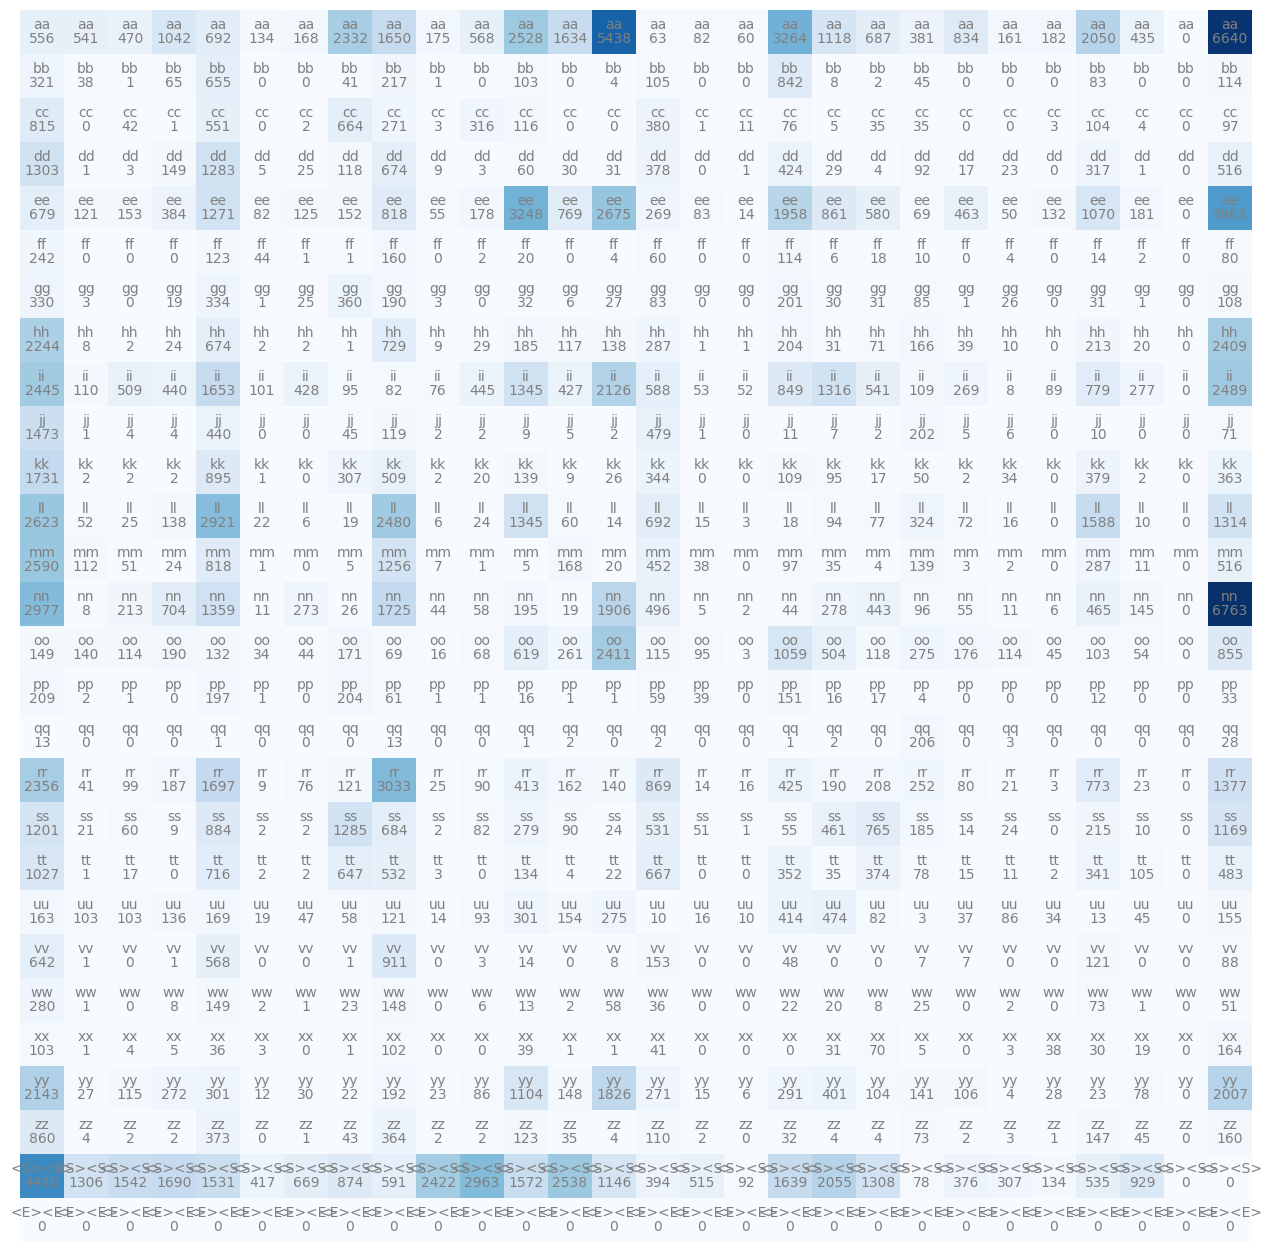

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.imshow(N)

plt. figure(figsize= (16,16)) 
plt. imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos [i] + itos [i] 
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')